In [8]:
import pandas as pd
import numpy as np
import os
import math

# From Trampush et al., 2014
Trampush_velocities = {
    '50':1.2843137254901962,
    '25':0.8413867822318526,
    '75':1.6939077776156426
}

seconds_in_month = 2629800

R = 1.65 # Submerged specific gravity for quartz
g = 9.81 # gravity

rho = 1000 # density of water (kg/m^3)
ps =  2650 # density of sediment (kg/m^3)
t_crit = 0.03 # critical shields stress

a0 = -2.08
a1 = 0.254
a2 = -1.09

D50_trampush = lambda Hbf, slope: np.exp((np.log10(slope) - a0 - (a2 * np.log10(Hbf)))/a1) # invert for D50 (mm)

def add_1ms_depth_25(row): # Assuming a flow of 1ms
    velocity_25 = Trampush_velocities['25']
    return row['discharge [cms]']/velocity_25/row['Width [m]']

def add_1ms_depth_50(row): # Assuming a flow of 1ms
    velocity_50 = Trampush_velocities['50']
    return row['discharge [cms]']/velocity_50/row['Width [m]']
    
def add_1ms_depth_75(row): # Assuming a flow of 1ms
    velocity_75 = Trampush_velocities['75']
    return row['discharge [cms]']/velocity_75/row['Width [m]']

Hbf_Dunne = lambda S, tc, rho, g: (1.2*tc)/(rho*g*S)

def KJ_depth(row): # Dunne and Jerolmack, 2018
    return Hbf_Dunne(row['S [-]'], 8, 1000, g)

def check_Hbf_recorded(row):
    if row['Hbf [m] (recorded)'] != 0:
        return row['Hbf [m] (recorded)']
    else:
        return row['Hbf [m] (1ms 50)']
#         return row['Hbf [m] (K&J)']

def add_D50_shields(row):
    return (row['Tb']/(t_crit*(ps-rho)*g))
    
def add_D50_1ms_25(row): # Using Trampush et al. 2014 relation
    
    return float(D50_trampush(row['Hbf [m] (1ms 25)'], row['S [-]']))/float(1000)

def add_D50_1ms_50(row): # Using Trampush et al. 2014 relation
    return float(D50_trampush(row['Hbf [m] (1ms 50)'], row['S [-]']))/float(1000)

def add_D50_1ms_75(row): # Using Trampush et al. 2014 relation
    return float(D50_trampush(row['Hbf [m] (1ms 75)'], row['S [-]']))/float(1000)

def tb_depth_slope(row):
    return rho*g*row['Hbf [m] (1ms 50)']*row['S [-]']



In [9]:
# Global data
global_avulsions = pd.read_csv(os.path.join('data', 'global_avulsion_db_merged.csv'))

global_avulsions['S [-]'] = global_avulsions['S [-]']

global_avulsions['Hbf [m] (1ms 25)'] = global_avulsions.apply(add_1ms_depth_25, axis=1) 
global_avulsions['Hbf [m] (1ms 50)'] = global_avulsions.apply(add_1ms_depth_50, axis=1) 
global_avulsions['Hbf [m] (1ms 75)'] = global_avulsions.apply(add_1ms_depth_75, axis=1) 
global_avulsions['Hbf [m] (K&J)'] = global_avulsions.apply(KJ_depth, axis=1) 
global_avulsions['Hbf [m] (best guess)'] = global_avulsions.apply(check_Hbf_recorded, axis=1) 

global_avulsions['Tb'] = global_avulsions.apply(tb_depth_slope, axis=1)

global_avulsions['D50 [m] (1ms 25)'] = global_avulsions.apply(add_D50_1ms_25, axis=1) 
global_avulsions['D50 [m] (1ms 50)'] = global_avulsions.apply(add_D50_1ms_50, axis=1) 
global_avulsions['D50 [m] (1ms 75)'] = global_avulsions.apply(add_D50_1ms_75, axis=1)
global_avulsions['D50 [m] (shields)'] = global_avulsions.apply(add_D50_shields, axis=1)

global_avulsions

Av_ID                            River        From  L_A [km]  \
0      AFR0211_1998                        Catumbela       study     2.049   
1        ANGO2_2003                         Coporolo       study    16.376   
2       BS0115_1995                             Kura       study     7.780   
3       CA0067_1986                          Motagua       study    29.771   
4       CA0194_2007                           Samala       study     2.459   
5        CASP1_1991                        Sefid Rud       study     3.430   
6       JAVA12_1985                    Bengawan Solo       study    13.168   
7        JAVA2_1984                           Serang       study     6.135   
8        JAVA3_1992                            Bodri       study     1.648   
9        JAVA4_1973                            Comal       study     4.209   
10       JAVA5_1995                         Kelampis       study     2.359   
11       JAVA5_1998                         Kelampis       study     4.468   
12       JAVA5_2018                         Kelampis       study     2.836   
13       JAVA6_2010                  Cirambatan Baru       study     1.940   
14       JAVA7_1982                        Cikandung       study     2.779   
15       JAVA7_1990                        Cikandung       study     1.608   
16       JAVA7_2010                        Cikandung       study     1.220   
17       JAVA8_2018                         Kali Cbl       study     1.948   
18       JAVA9_2014                         Cisadane       study     2.359   
19     MALAWI1_2014                         Lilongwe       study     3.277   
20      PI0019_1989                     Batu Gerigis       study     2.468   
21      PI0209_2006                           Pemali       study     4.700   
22      PI0769_1982                             Agos       study     2.969   
23      SA0210_1996                          Mitrare       study    16.421   
24      SA0505_1999                           Tumbes       study    12.603   
25       SUMA2_2005                        Peusangan       study     1.699   
26      VENEZ1_1982                        Catatumbo       study    10.356   
27      VENEZ2_1986                            Misoa       study     1.000   
28      VENEZ2_2009                            Misoa       study     0.499   
29             NILE                             Nile      global   210.000   
30        MAGDALENA                        Magdalena      global    67.000   
31          ORINOCO                          Orinoco      global    78.000   
32            RHINE                      Rhine-Meuse      global    51.000   
33           DANUBE                           Danube      global    95.000   
34           PARANA                           Paraná      global   210.000   
35      MISS_MODERN  Mississippi, Modern-Atchafalaya      global   490.000   
36   MISS_LAFOURCHE    Mississippi, Lafourche-Modern      global   100.000   
37     HUANGHE_1930                          Huanghe      global    51.600   
38          MANGOKY                          Mangoky  madagascar    55.750   
39   MANAMBOLO_2004                        Manambolo  madagascar    22.650   
40   MORONDAVA_1979                        Morondava  madagascar    38.210   
41      SAMBAO_2004                           Sambao  madagascar    30.450   
42  FIHERENANA_2001                       Fiherenana  madagascar     5.240   

    L_A_error [km]     S [-]  S_IQR [-]  D50 [m] (recorded)  \
0              0.0  0.000272   0.000218             0.00050   
1              0.0  0.002931   0.000122             0.00000   
2              0.0  0.000357   0.000233             0.00020   
3              0.0  0.000313   0.000188             0.00000   
4              0.0  0.002075   0.001156             0.00000   
5              0.0  0.000450   0.000794             0.00000   
6              0.0  0.000329   0.000265             0.00000   
7              0.0  0.000452   0.000346             0.00000   
8             

<ipython-input-19-a0776789a521>:5: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log", nonposx='clip')
<ipython-input-19-a0776789a521>:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


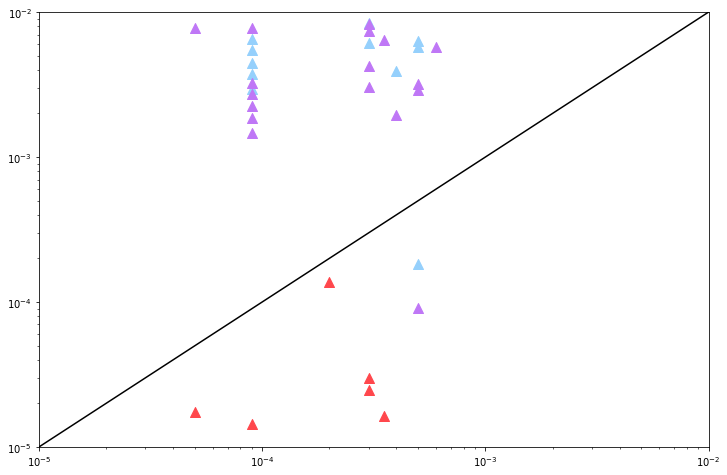

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

has_recorded = global_avulsions['D50 [m] (recorded)']>0

recorded_D50 = global_avulsions['D50 [m] (recorded)'][has_recorded]
shields_D50 = global_avulsions['D50 [m] (shields)'][has_recorded]
v1ms_D50 = global_avulsions['D50 [m] (1ms 50)'][has_recorded]
mid_D50 = (shields_D50+v1ms_D50)/2

h1 = ax.scatter(recorded_D50, shields_D50, s=100, marker='^', c='xkcd:light blue') 
h2 = ax.scatter(recorded_D50, v1ms_D50, s=100, marker='^', c='xkcd:light red') 
h3 = ax.scatter(recorded_D50, mid_D50, s=100, marker='^', c='xkcd:light purple') 

refplot = np.linspace(.00001,0.01,100)
ax.plot(refplot,refplot, color='k')

ax.set_ylim(bottom=.00001, top=0.01)
ax.set_xlim(left=.00001, right=0.01)

plt.show()